In [1]:
import pandas as pd
path = 'path/url  to dataset'
df = pd.read_csv(path)

In [2]:
df = df.drop("Diagonistic_Spending",axis=1)
df.head()
labels = df.columns

In [3]:
df.head()

,Sex,City,Age,Disease,Year,amt
0,Female,Hamburg,31,Oligomenorrhea,2007,59.97
1,Male,Koln,68,Mumps,2005,12.73
2,Female,Mainz,60,Lateralepicondylitis,2005,140.95
3,Male,Dresden,36,Typhoid,2005,63.29
4,Male,Saarbrcken,49,Acuteotitismedia,2007,12.73


In [4]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
#feat = 'Sex','City','Disease'
f1 = df[["Sex"]]
f2=df[["City"]]
f3=df[["Disease"]]
f1 = enc.fit_transform(f1)
f2 = enc.fit_transform(f2)
f3 = enc.fit_transform(f3)

In [5]:
#to dataframe
f1 = pd.DataFrame(f1,columns=['Sex'])
f2 = pd.DataFrame(f2,columns=['City'])
f3 = pd.DataFrame(f3,columns=['Disease'])
f1.head()

,Sex
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


In [6]:
df1 = df.drop(["Sex","City","Disease"],axis=1).head()

In [7]:
#concatenate with processed columns
df2 = pd.concat([df1,f1],axis=1)
fx = pd.concat([f2,f3],axis=1)
df2 = pd.concat([df2,fx],axis=1)

In [8]:
df2.head()

,Age,Year,amt,Sex,City,Disease
0,31.0,2007.0,59.97,0.0,8.0,20.0
1,68.0,2005.0,12.73,1.0,13.0,18.0
2,60.0,2005.0,140.95,0.0,16.0,16.0
3,36.0,2005.0,63.29,1.0,3.0,33.0
4,49.0,2007.0,12.73,1.0,22.0,0.0


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      5 non-null      float64
 1   Year     5 non-null      float64
 2   amt      5 non-null      float64
 3   Sex      46 non-null     float64
 4   City     46 non-null     float64
 5   Disease  46 non-null     float64
dtypes: float64(6)
memory usage: 2.3 KB


In [10]:
df2.describe()

,Age,Year,amt,Sex,City,Disease
count,5.000000,5.000000,5.000000,46.000000,46.000000,46.000000
mean,48.800000,2005.800000,57.934000,0.673913,11.347826,18.739130
std,15.610894,1.095445,52.467351,0.473960,6.948117,9.929607
min,31.000000,2005.000000,12.730000,0.000000,0.000000,0.000000
25%,36.000000,2005.000000,12.730000,0.000000,4.250000,10.250000
50%,49.000000,2005.000000,59.970000,1.000000,11.500000,20.000000
75%,60.000000,2007.000000,63.290000,1.000000,18.000000,27.000000
max,68.000000,2007.000000,140.950000,1.000000,22.000000,34.000000


# plots

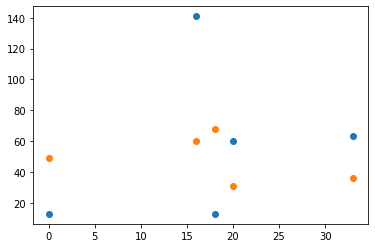

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df2['Disease'],df2['amt'])
plt.scatter(df2['Disease'],df2['Age'])
plt.show()

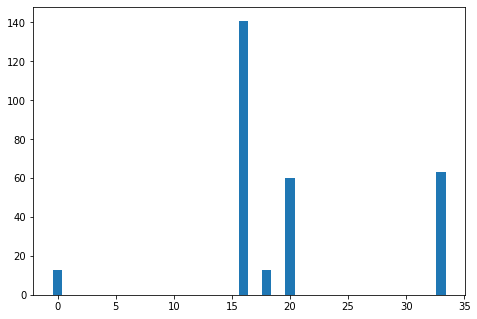

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
disease = df2['Disease']
cost = df2['amt']
ax.bar(disease,cost)
plt.show()

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])
df2 = num_pipeline.fit_transform(df2)
df2 = pd.DataFrame(df2,columns=labels)

### predict amount

In [16]:
y = df2['amt']
X = df2.drop('amt',axis=1)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## using ridge regression

In [21]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)
y_ridge = ridge_reg.predict(X_test)

## using lasso

In [23]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_lasso = lasso_reg.predict(X_test)

## using elastic net

In [25]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_net = elastic_net.predict(X_test)

## analyze the accuracy of models
## using rmse

In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_lasso, y_test)
lin_rmse = np.sqrt(lin_mse)
print("lasso_mse:",lin_rmse)

lasso_mse: 1.1887989875039844


In [32]:
lin_mse = mean_squared_error(y_ridge, y_test)
lin_rmse = np.sqrt(lin_mse)
print("ridge_mse:",lin_rmse)

ridge_mse: 1.2007406741639801


In [33]:
lin_mse = mean_squared_error(y_net, y_test)
lin_rmse = np.sqrt(lin_mse)
print("ridge_mse:",lin_rmse)

ridge_mse: 1.1887989875039844


## lasso & elastic net give equal values of rmse
## either of the models can be used for prediction in the future